scipy.signal.chirp
scipy.signal.chirp(t, f0, t1, f1, method='linear', phi=0, vertex_zero=True)[source]
Frequency-swept cosine generator.

In the following, ‘Hz’ should be interpreted as ‘cycles per unit’; there is no requirement here that the unit is one second. The important distinction is that the units of rotation are cycles, not radians. Likewise, t could be a measurement of space instead of time.

In [ ]:
from scipy.signal import chirp, spectrogram
import matplotlib.pyplot as plt
import numpy as np
t = np.linspace(0, 10, 5001)
w = chirp(t, f0=6, f1=1, t1=10, method='linear')
plt.plot(t, w)
plt.title("Linear Chirp, f(0)=6, f(10)=1")
plt.xlabel('t (sec)')
plt.show()

For the remaining examples, we’ll use higher frequency ranges, and demonstrate the result using scipy.signal.spectrogram. We’ll use a 10 second interval sampled at 8000 Hz.

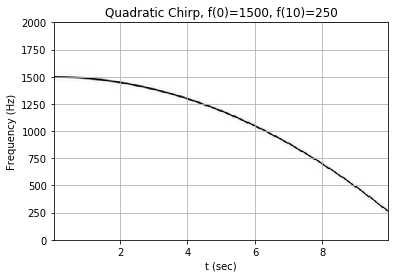

In [5]:
fs = 8000
T = 10
t = np.linspace(0, T, T*fs, endpoint=False)
w = chirp(t, f0=1500, f1=250, t1=10, method='quadratic')

ff, tt, Sxx = spectrogram(w, fs=fs, noverlap=256, nperseg=512,
                          nfft=2048)
plt.pcolormesh(tt, ff[:513], Sxx[:513], cmap='gray_r')
plt.title('Quadratic Chirp, f(0)=1500, f(10)=250')
plt.xlabel('t (sec)')
plt.ylabel('Frequency (Hz)')
plt.grid()
plt.show()

Quadratic chirp from 1500 Hz to 250 Hz over 10 seconds (vertex of the parabolic curve of the frequency is at t=10):

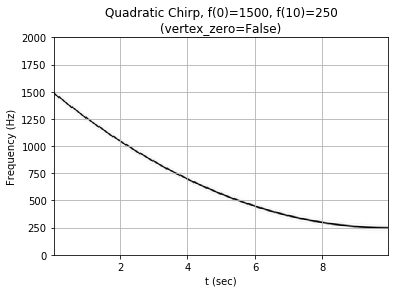

In [6]:
w = chirp(t, f0=1500, f1=250, t1=10, method='quadratic',
          vertex_zero=False)
ff, tt, Sxx = spectrogram(w, fs=fs, noverlap=256, nperseg=512,
                          nfft=2048)
plt.pcolormesh(tt, ff[:513], Sxx[:513], cmap='gray_r')
plt.title('Quadratic Chirp, f(0)=1500, f(10)=250\n' +
          '(vertex_zero=False)')
plt.xlabel('t (sec)')
plt.ylabel('Frequency (Hz)')
plt.grid()
plt.show()